In [1]:
#%matplotlib notebook

# load dependencies
import json
import requests
from matplotlib import pyplot as plt
from scipy.stats import linregress
from pprint import pprint
import pandas as pd
import scipy.stats as st

In [2]:
# read in files

data = pd.read_csv('Clean_Data_Output/statista.csv')
home_values = pd.read_csv('Resources/median_house_value.csv')
income = pd.read_csv('Clean_Data_Output/Data.csv')

# merge csv files
property_df = pd.merge(data, home_values, on='State', how='outer')
property_df = pd.merge(property_df, income, on='State', how='outer')

# check the file has been read in
property_df.head()

,Index,State,Murder Count,Total Population,Homicide Rate,Unemployment Rate,Abbreviation,Average FICO Score,Median Home Value,Average Outstanding Mortgage Amount,Difference Between Value and Mortgage Balance,,Unnamed: 0,Median Income (2019),2019 Population,Population (2019),Total Murders (2019)
0,0,Alabama,358,4903185,73.013766,2.7,AL,680,134300,141302,-7002,,0,56200,731545,731545,4
1,1,Alaska,69,731545,94.320924,6.0,AK,707,326000,223167,102833,,1,78394,7278717,7278717,69
2,2,Arizona,365,7278717,50.146200,4.6,AZ,696,257600,202959,54641,,2,70674,3017804,3017804,337
3,3,Arkansas,242,3017804,80.190761,3.6,AR,683,129500,129383,117,,3,54539,39512223,39512223,231
4,4,California,"1,690",39512223,42.771575,3.9,CA,708,550800,363891,186909,,4,78105,5758736,5758736,1679


In [3]:
# clean dataframe with only the relevant data
data_df = property_df[['State', 'Total Population', 'Median Income (2019)', 'Median Home Value','Unemployment Rate',
                        'Murder Count', 'Homicide Rate']]
# rename columns
data_df = data_df.rename(columns={'Median Income (2019)':'Median Income', 'Murder Count': 'Total Murders'})

# sort values
data_df = data_df.sort_values(by='Homicide Rate', ascending=False)

# check df for errors
data_df.head()

,State,Total Population,Median Income,Median Home Value,Unemployment Rate,Total Murders,Homicide Rate
8,District of Columbia,705749,93111,567800,5.3,166,235.211102
18,Louisiana,4648794,51707,147600,4.9,544,117.019597
24,Mississippi,2976149,44787,130200,5.7,332,111.553555
1,Alaska,731545,78394,326000,6.0,69,94.320924
25,Missouri,6137428,60597,163700,3.3,568,92.546911


The correlation coefficient between the two factors is -0.107
The r-squared is: 0.01150581302224434


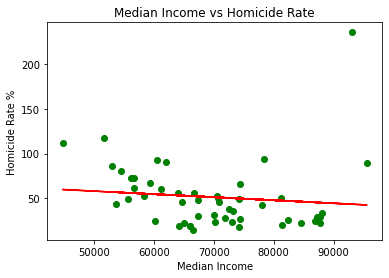

In [4]:
# create scatter plot for median income and homicide rate with linregress

# plot linregress
x_values = data_df['Median Income']
y_values = data_df['Homicide Rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='green')
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(500000,1300),fontsize=15,color="red")
plt.xlabel('Median Income')
plt.ylabel('Homicide Rate %')
plt.title('Median Income vs Homicide Rate')

# print r-valaue and correlation
corr = st.pearsonr(x_values,y_values)

print(f"The correlation coefficient between the two factors is {round( (corr[0]),3)}")
print(f"The r-squared is: {rvalue**2}")

# show plot
plt.show()

# save fig as output
#plt.savefig('Image Output/median_income_st')

The correlation coefficient between the two factors is 0.067
The r-squared is: 0.004462202076839075


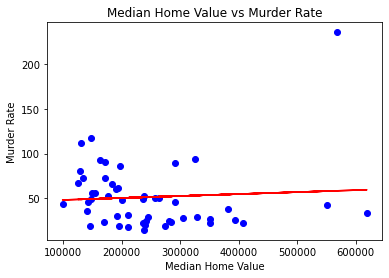

In [5]:
# create scatter plot for median home value and homicide rate with linregress

# plot linregress
x_values = data_df['Median Home Value']
y_values = data_df['Homicide Rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='blue')
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(500000,1300),fontsize=15,color="red")
plt.xlabel('Median Home Value')
plt.ylabel('Homicide Rate %')
plt.title('Median Home Value vs Homicide Rate')

# print r-valaue and correlation
corr = st.pearsonr(x_values,y_values)

print(f"The correlation coefficient between the two factors is {round( (corr[0]),3)}")
print(f"The r-squared is: {rvalue**2}")

# show plot
plt.show()

# save fig as output
#plt.savefig('Image Output/home_value_st')

The correlation coefficient between the two factors is 0.525
The r-squared is: 0.27534079235024694


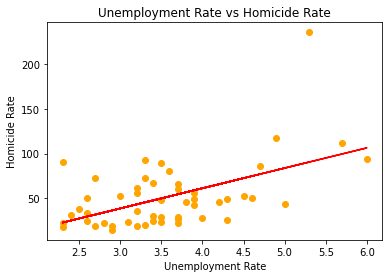

In [6]:
# create scatter plot for unemployment rate and homicide rate

# plot linregress
x_values = data_df['Unemployment Rate']
y_values = data_df['Homicide Rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='orange')
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(500000,1300),fontsize=15,color="red")
plt.xlabel('Unemployment Rate')
plt.ylabel('Homicide Rate %')
plt.title('Unemployment Rate vs Homicide Rate')

# print r-valaue and show plot
unemployment = data_df['Unemployment Rate']
homicide_rate = data_df['Homicide Rate']
corr = st.pearsonr(unemployment, homicide_rate)

print(f"The correlation coefficient between the two factors is {round( (corr[0]),3)}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

# save fig as output
#plt.savefig('Image Output/unemployment_st')

In [9]:
# BONUS: Generate the correlation matrix and find the strongest positive and negative correlations

homicide_corr = data_df.corr()
homicide_corr.unstack().sort_values()

homicide_corr

,Total Population,Median Income,Median Home Value,Unemployment Rate,Homicide Rate
Total Population,1.000000,0.011151,0.169137,0.042558,-0.034306
Median Income,0.011151,1.000000,0.702282,-0.192988,-0.107265
Median Home Value,0.169137,0.702282,1.000000,-0.024518,0.066800
Unemployment Rate,0.042558,-0.192988,-0.024518,1.000000,0.524729
Homicide Rate,-0.034306,-0.107265,0.066800,0.524729,1.000000


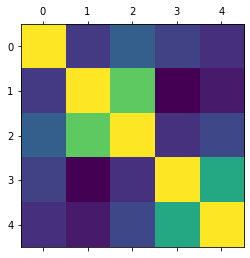

In [8]:
# correlation map for fun

plt.matshow(data_df.corr())
plt.show()